In [ ]:
##preparing for the tools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#models from scikitlearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluations
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.metrics import RocCurveDisplay

#LOAD DATA
df = pd.read_csv("heart-disease.csv")
df
#find out more about the data and become a subject matter expert on it
#look for outliers



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: >

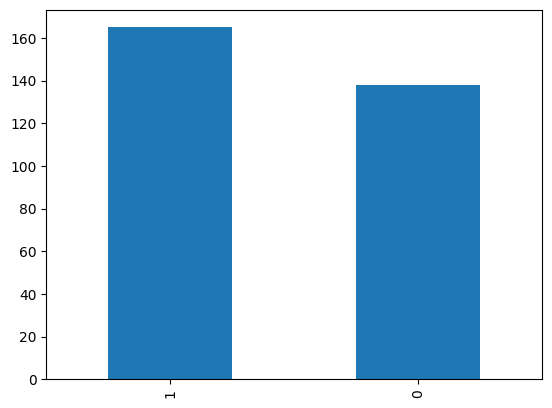

In [ ]:
df["target"].value_counts().plot(kind= "bar")

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
pd.crosstab(df.sex , df.target)

target,0,1
sex,,
0,24,72
1,114,93


<ipython-input-7-75db5c43a5a0>:7: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend("disease" , "no disease")


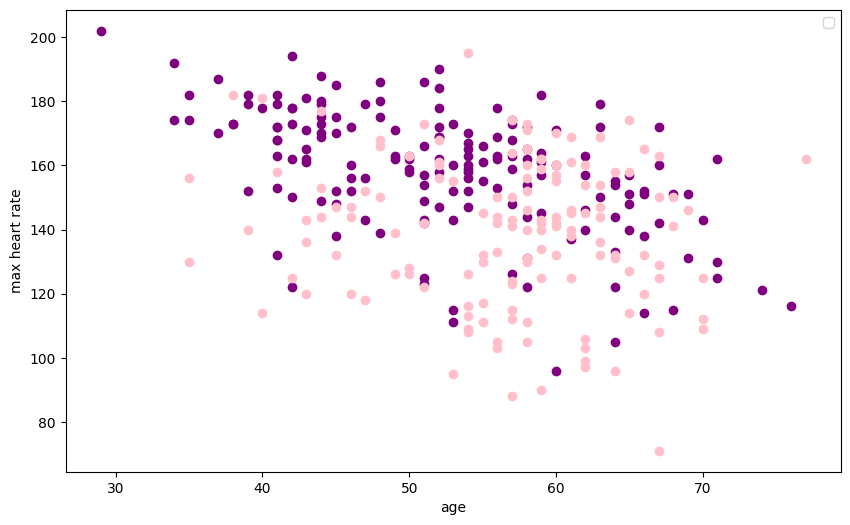

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],
  df.thalach[df.target==1] , c="purple")
plt.scatter(df.age[df.target==0] , df.thalach[df.target==0] , c="pink")
plt.xlabel("age")
plt.ylabel("max heart rate")
plt.legend("disease" , "no disease")

<Axes: ylabel='Frequency'>

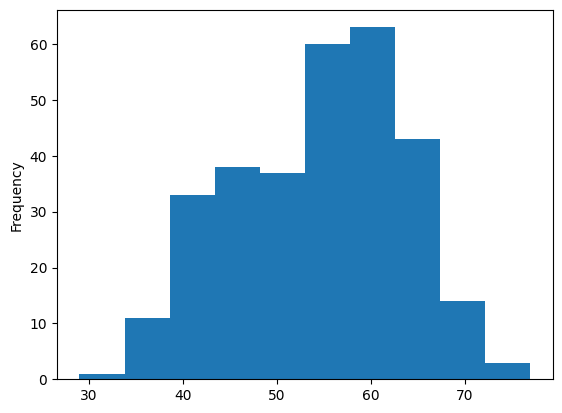

In [ ]:
df.age.plot.hist()

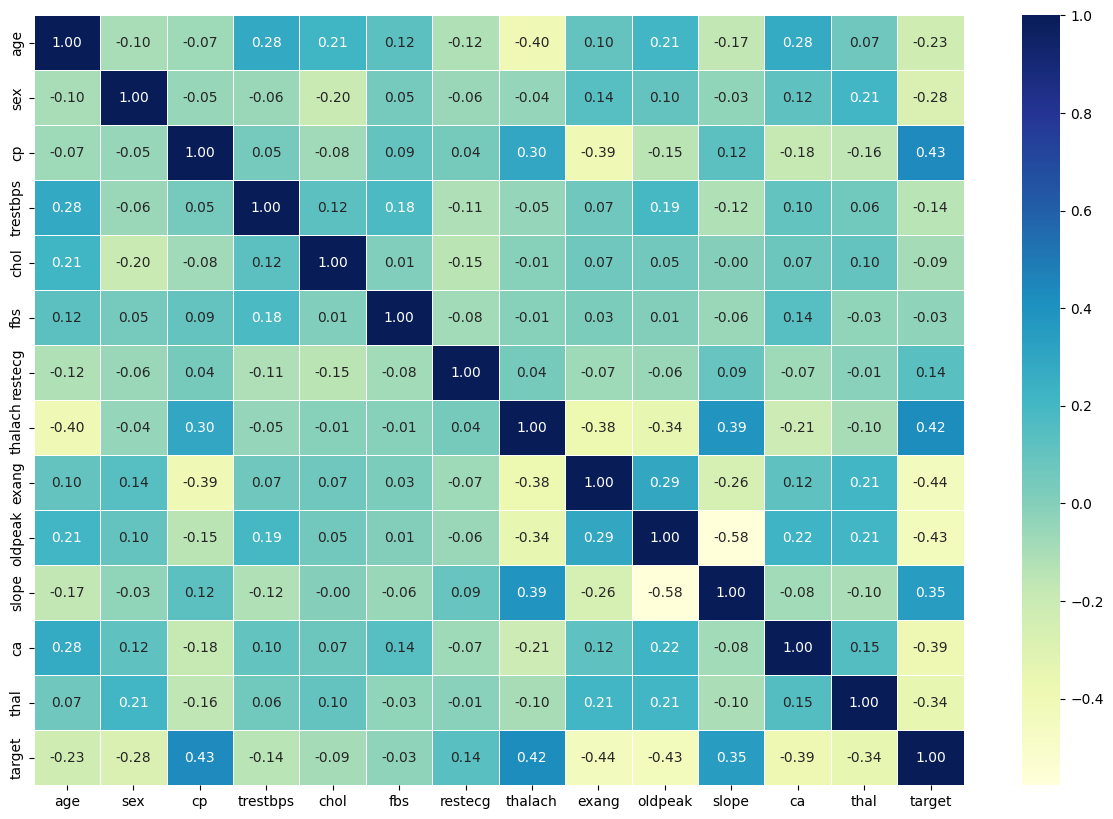

In [ ]:
#mkainh a correlation matrix
corr_matrix = df.corr()
fig , ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix , annot=True , linewidths=0.5 ,fmt=".2f"  , cmap="YlGnBu" );


MODELLING


In [ ]:
#negative correlation = inversely proportional
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
x= df.drop("target" , axis=1)
y=df.target
x , y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

In [ ]:
np.random.seed(42)
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2)

In [ ]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


we will try 3 mls
knn
randomforestclassifier
logisticregression


In [ ]:
#put models in a dictionary
models1= { "Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier() ,
          "Random Forest":RandomForestClassifier() }

In [ ]:
#create  a func to fit and score models
def fit_and_score(models1, x_train , x_test , y_train , y_test):
  np.random.seed(42)
  model_scores={}
  for name , model in models1.items():
    model.fit(x_train , y_train)
    model_scores[name] = model.score(x_test , y_test)
  return model_scores

In [ ]:
model_scores= fit_and_score(models1=models1,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

MODEL COMPARISON

<Axes: >

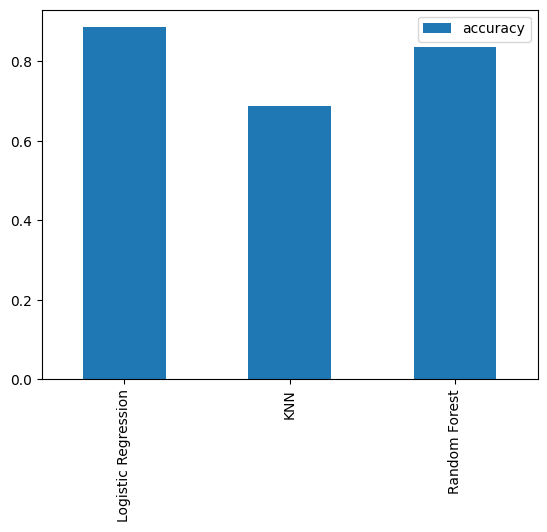

In [ ]:
model_compare=pd.DataFrame(model_scores , index=["accuracy"])
model_compare.T.plot.bar()

now we are gonna look at
1 hyperparameter tuning
confusion matrix
feature importance
cross-validation
precision
recall
f1 score
classificatiom report
roc curve
area under the curve


In [ ]:
#hyperparameter tuning
#KNN KO TUNE KARTE HAIN
train_scores = []
test_scores = []
neighbors= range(1,21)
knn = KNeighborsClassifier()
for i in neighbors:
  knn.set_params(n_neighbors=i)
  knn.fit(x_train , y_train)
  train_scores.append(knn.score(x_train , y_train))
  test_scores.append(knn.score(x_test , y_test))


In [ ]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [ ]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

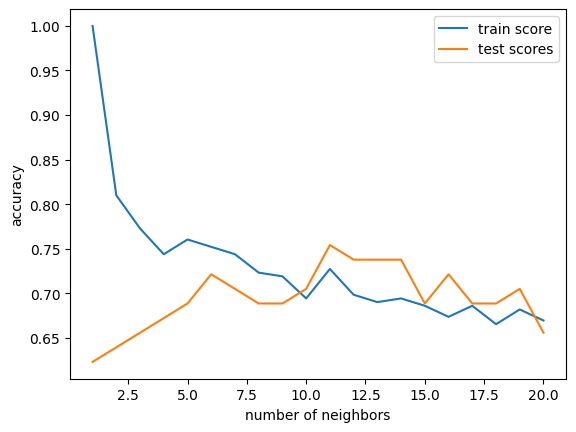

In [ ]:
plt.plot(neighbors ,  train_scores , label="train score")
plt.plot(neighbors , test_scores , label="test scores")
plt.xlabel("number of neighbors")
plt.ylabel("accuracy")
plt.legend()

we are discarding knn because max is 75 percent accuracy anyway
hyperparam... with randomisedsearchcv


In [ ]:
#we will tune our logistic regression model
#cross validation is nice
#hyp grid for lr
log_reg_grid={ "C" : np.logspace(-4,4,20),
               "solver" : ["liblinear"]}
rf_grid = {"n_estimators": np.arange(10,100,50) ,
           "max_depth" :[None , 3,5,10],
           "min_samples_split": np.arange(2, 20,2),
           "min_samples_leaf": np.arange(1,20,2)

           }

In [ ]:
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression() ,
                                param_distributions=log_reg_grid,
                                cv=6,
                                n_iter=20,
                                verbose=True
                                )
rs_log_reg.fit(x_train , y_train)

Fitting 6 folds for each of 20 candidates, totalling 120 fits


RandomizedSearchCV(cv=6, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.score(x_test , y_test)

0.8852459016393442

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [ ]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier() ,
                                param_distributions=rf_grid,
                                cv=10,
                                n_iter=50,
                                verbose=True
                                )
rs_rf.fit(x_train , y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [ ]:
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': 5}

In [ ]:
rs_rf.score(x_test , y_test)

0.8852459016393442

In [ ]:
#now we will improve our lr model by using grid search cv
log_reg_grid={ "C" : np.logspace(-4,4,40),
               "solver" : ["liblinear"]}


gs_log_reg= GridSearchCV(LogisticRegression() ,
                                param_grid=log_reg_grid,
                                cv=10,

                                verbose=True
                                )
gs_log_reg.fit(x_train , y_train)


Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.60371874e-04, 2.57191381e-04, 4.12462638e-04,
       6.61474064e-04, 1.06081836e-03, 1.70125428e-03, 2.72833338e-03,
       4.37547938e-03, 7.01703829e-03, 1.12533558e-02, 1.80472177e-02,
       2.89426612e-02, 4.64158883e-02, 7.44380301e-02, 1.19377664e-01,
       1.91448198e-01, 3.07029063e-01, 4.92388...652287e-01,
       1.26638017e+00, 2.03091762e+00, 3.25702066e+00, 5.22334507e+00,
       8.37677640e+00, 1.34339933e+01, 2.15443469e+01, 3.45510729e+01,
       5.54102033e+01, 8.88623816e+01, 1.42510267e+02, 2.28546386e+02,
       3.66524124e+02, 5.87801607e+02, 9.42668455e+02, 1.51177507e+03,
       2.42446202e+03, 3.88815518e+03, 6.23550734e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
gs_log_reg.score(x_train , y_train)

0.8636363636363636

In [ ]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [ ]:
##we will tune other things like roc curve auc
y_preds=gs_log_reg.predict(x_test)

In [ ]:
#plot roc curve and calculate auc
RocCurveDisplay(gs_log_reg , x_test , y_test)

TypeError: ignored

In [ ]:
print(confusion_matrix(y_test , y_preds))

[[25  4]
 [ 5 27]]


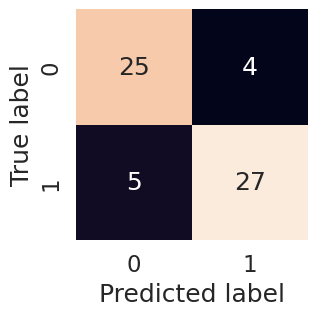

In [ ]:
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis

plot_conf_mat(y_test, y_preds)

In [ ]:
print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
gs_log_reg.best_params_

{'C': 21.54434690031882, 'solver': 'liblinear'}

In [ ]:
clf= LogisticRegression(C=21.54434690031882, solver="liblinear")

In [ ]:
cv_acc= cross_val_score(clf,
                          x,
                          y,
                          cv=5,
                          scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.8281967213114754

In [ ]:
cv_f1= cross_val_score(clf,
                          x,
                          y,
                          cv=5,
                          scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8489954136494248

In [ ]:
cv_precision= cross_val_score(clf,
                          x,
                          y,
                          cv=5,
                          scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8231691919191919

In [ ]:
cv_recall= cross_val_score(clf,
                          x,
                          y,
                          cv=5,
                          scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.8787878787878787

In [ ]:
clf= LogisticRegression(C=21.54434690031882, solver="liblinear")

In [ ]:
clf.fit(x_train , y_train)

LogisticRegression(C=21.54434690031882, solver='liblinear')

In [ ]:
clf.coef_

array([[-0.00339195, -1.72510552,  0.85309272, -0.01619327, -0.00346396,
         0.26606664,  0.59951534,  0.02142875, -1.11385531, -0.64445175,
         0.7661003 , -0.84567843, -0.97588729]])

In [ ]:
feature_dict=dict(zip(df.columns , list(clf.coef_[0])))
feature_dict

{'age': -0.003391949350073709,
 'sex': -1.7251055163311324,
 'cp': 0.8530927163618983,
 'trestbps': -0.016193265053314046,
 'chol': -0.0034639626071951246,
 'fbs': 0.2660666435342271,
 'restecg': 0.599515336732464,
 'thalach': 0.021428753778460423,
 'exang': -1.1138553116732122,
 'oldpeak': -0.6444517500338303,
 'slope': 0.7661002976456032,
 'ca': -0.8456784268155444,
 'thal': -0.9758872866671352}